In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

In [3]:
# EDA for SALES dataset

df = pd.read_csv(r"C:\Users\nehup\Downloads\Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
print(df.shape)

(30, 3)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [6]:
print(df.describe())

       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


In [7]:
# Not to include unnamed column

df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
# To check for duplicates

dups = df.duplicated()
print("Number of duplicate rows = %d " %(dups.sum()))
df[dups]

# No duplicates

Number of duplicate rows = 0 


,YearsExperience,Salary


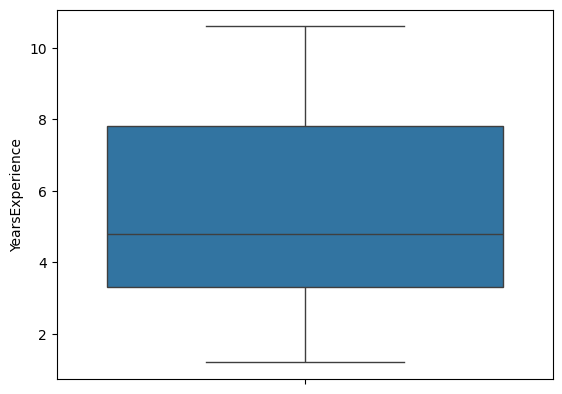

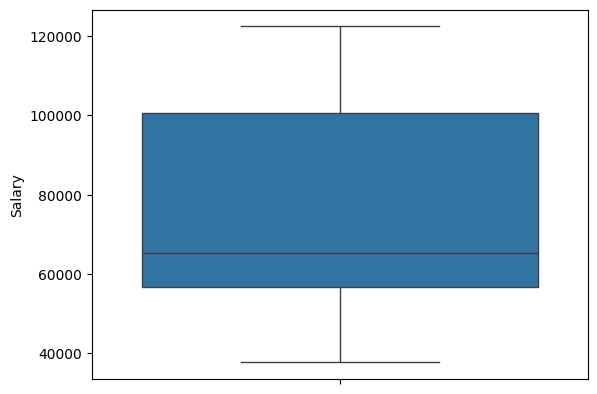

In [9]:
# To check for outliers as boxplot

sns.boxplot(df['YearsExperience'])
plt.show()

sns.boxplot(df['Salary'])
plt.show()  
 




In [10]:
# to check for missing values

print(df.isnull().sum())

# No missing values
print(df.dtypes)

YearsExperience    0
Salary             0
dtype: int64
YearsExperience    float64
Salary             float64
dtype: object


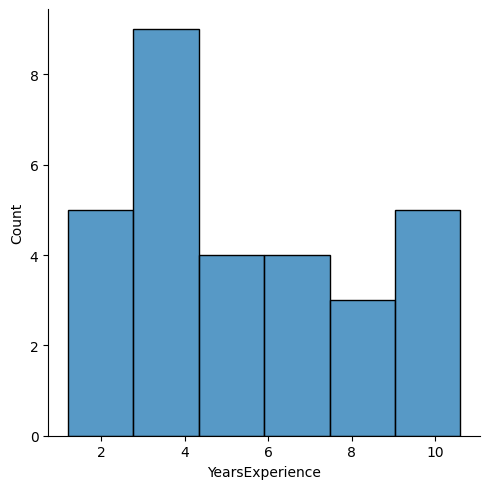

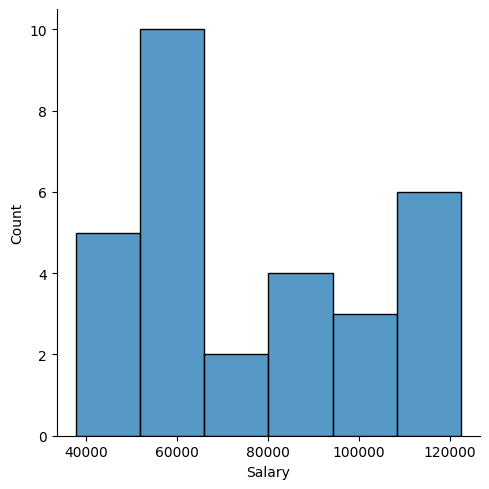

In [11]:
# Univariate analysis

sns.displot(df['YearsExperience'])
plt.show()

sns.displot(df['Salary'])
plt.show()

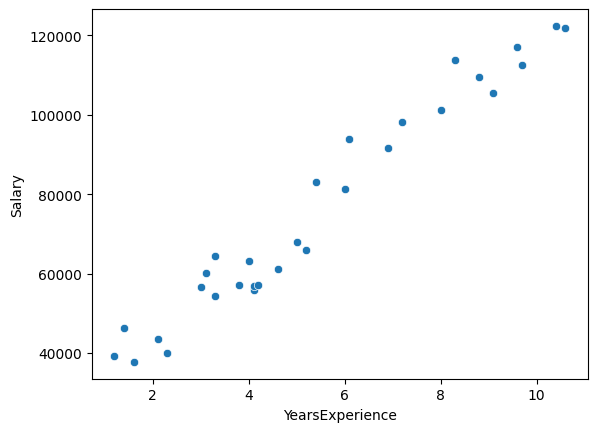

In [12]:
# Bivariate analysis

sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.show()

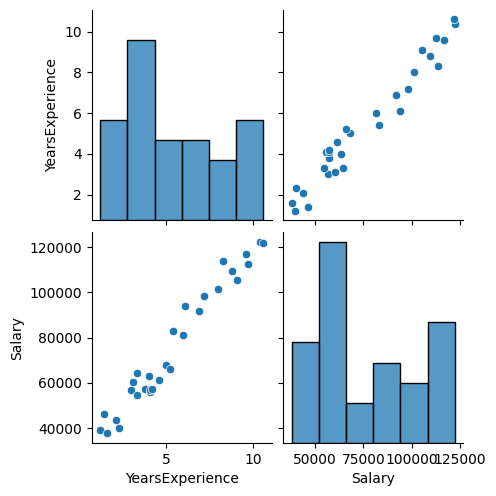

In [13]:
# Multivariate analysis

sns.pairplot(df)
plt.show()  

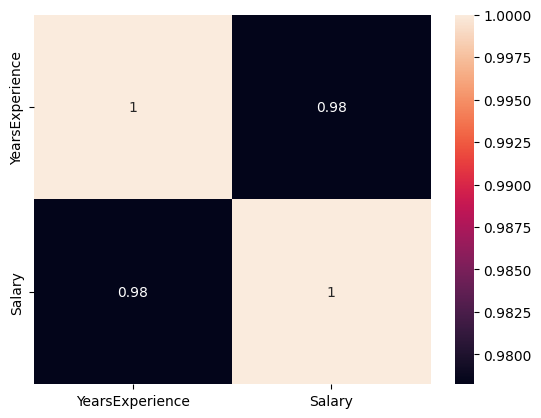

In [14]:
# Correlation analysis

sns.heatmap(df.corr(), annot = True)
plt.show()

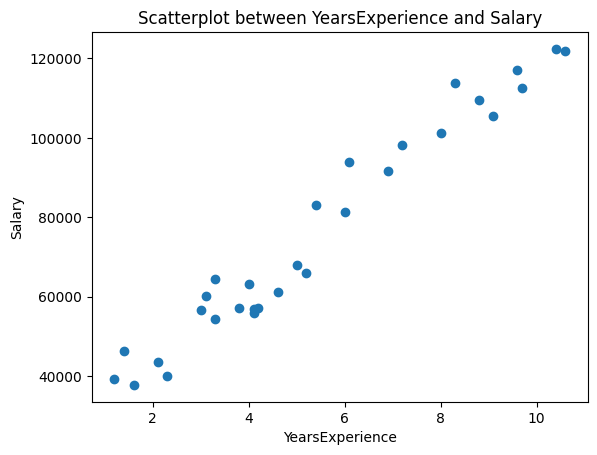

In [15]:
# scatterplot between x and y

x = df['YearsExperience']
y = df['Salary']
plt.title('Scatterplot between YearsExperience and Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x,y)

In [16]:
# checking dimensions of x and y

print(x.shape)
print(y.shape)


(30,)
(30,)


In [17]:
# Reshaping x and y

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
print(x.shape)
print(y.shape)

(30, 1)
(30, 1)


In [18]:
# To split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(10, 1)
(20, 1)
(10, 1)


In [19]:
# Fitting the model

from sklearn.linear_model import LinearRegression

# Train the model using training datasets
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict on the test dataset
y_pred = lr.predict(x_test)
print(y_pred)

[[115815.30756236]
 [ 71512.92534771]
 [102618.85328566]
 [ 75283.34085534]
 [ 55488.65944028]
 [ 60201.67882482]
 [122413.53470072]
 [107331.8726702 ]
 [ 63029.49045554]
 [ 35693.97802523]]


In [20]:
# To cpmpute model slope and intercept

a = lr.coef_
b = lr.intercept_
print("Estimated model slope = ", lr.coef_)
print("Estimated model intercept = ",lr.intercept_)

Estimated model slope =  [[9426.03876907]]
Estimated model intercept =  [24382.73150234]


In [21]:
# so our fitted regression line is

# y = a * x + b
# y = 9426.03876907 * x + 24382.73150234

In [22]:
# Predicting Expected Salary value for first 5 observations 

lr.predict(x[:5])

array([[35693.97802523],
       [37579.18577904],
       [39464.39353286],
       [44177.41291739],
       [46062.62067121]])

In [23]:
# To make an individual prediction using the linear regression model

print(lr.predict([[5]]))

[[71512.92534771]]


In [24]:
# Calculate and print root mea squared error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)

RMSE =  5941.5401107065545


In [25]:
# calculate and print r2_score

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 score = ", r2)

R2 score =  0.9553063138044949


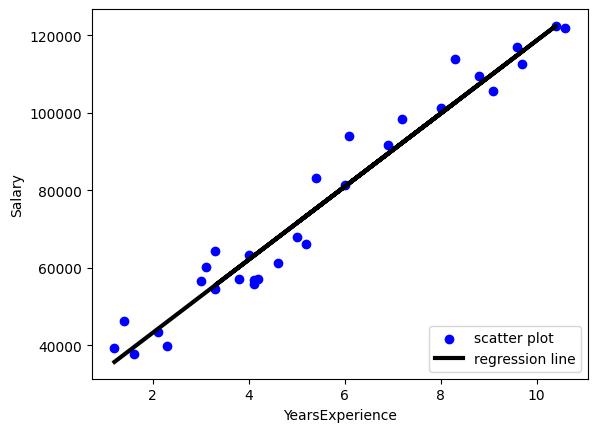

In [26]:
# Plot the Regression Line

plt.scatter(x,y, color = 'blue', label = 'scatter plot')
plt.plot(x_test, y_pred, color = 'black',linewidth = 3, label = 'regression line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 4)
plt.show()

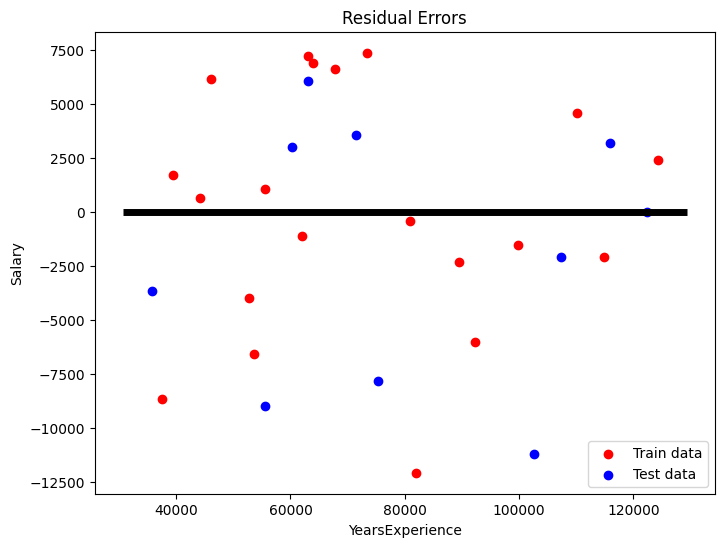

Residual errors =  [[  3179.30756236]
 [  3573.92534771]
 [-11194.14671434]
 [ -7805.65914466]
 [ -8957.34055972]
 [  3011.67882482]
 [    21.53470072]
 [ -2100.1273298 ]
 [  6071.49045554]
 [ -3650.02197477]]
Residual errors =  [[  6170.62067121]
 [  7368.13310153]
 [ -3982.15219044]
 [  6890.09433245]
 [  7234.49045554]
 [ -1511.95834506]
 [ -8626.81422096]
 [  1732.39353286]
 [  4576.68430092]
 [   651.41291739]
 [ -6023.78936032]
 [ -2097.29631454]
 [  -425.03588321]
 [  2425.74245453]
 [ -2316.60099105]
 [  1042.65944028]
 [ -1132.11342136]
 [  6630.50984008]
 [-12059.43200631]
 [ -6547.54831353]]


In [29]:
# Calculate the range of predicted values to define xmin and xmax
# Combine predictions from both train and test sets for the full range

train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)
min_pred = min(train_preds.min(), test_preds.min())
max_pred = max(train_preds.max(), test_preds.max())

# Plotting residual errors
plt.figure(figsize=(8, 6))
plt.scatter(train_preds, train_preds - y_train, color = 'red', label = 'Train data')
plt.scatter(test_preds, test_preds - y_test, color = 'blue', label = 'Test data')

plt.hlines(y = 0, xmin = min_pred - 5000, xmax = max_pred + 5000, color = 'black',linewidth = 5)

plt.title('Residual Errors')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 4)
plt.show()

print("Residual errors = ",lr.predict(x_test) - y_test)
print("Residual errors = ",lr.predict(x_train) - y_train)

